Comoving distance to a galaxy at z=0.300 is 3.90 Glyr (without radiation for now)
Distance to a galaxy at z=1.000 when a=0.5 is 1.95 Glyr
zarr= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4. ]


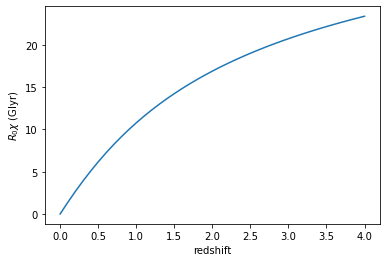

In [1]:
# First let's set up our packages
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
from numpy import sqrt

# And set some constants
c = 299792.458 # km/s (speed of light)

H0kmsmpc = 70.  # Hubble constant in km/s/Mpc
cH0mpc = c/H0kmsmpc   # c/H0 in Mpc  (the km/s cancel out in the numerator and denominator)
cH0Glyr = cH0mpc * 3.262 / 1000 #c/H0 in billions of light years.  There are 3.262 light year / parsec

# Write a function for the integrand, i.e. $1/E(z)$,
def Ezinv(z, om, ol):
    ok = 1.0-om-ol
    Ez = np.sqrt(om * (1+z)**3 + ok * (1+z)**2 + ol) # left out radiation for now.
    return 1.0/Ez

# Choose the redshift (e.g. z=0.3)
z=0.3

# Choose a cosmology
om, ol = 0.3, 0.7

# Calcuate the integral (just the int_0^z(dz/E(z)) part, which givers xx=R0*X/(c/H_0)):
xx = integrate.quad(Ezinv,0,z,args=(om,ol))[0] 

# Sub in the required constants to get the comoving distance R_0*X
R0X = xx*cH0Glyr # Distance in Glyr

print('Comoving distance to a galaxy at z=%.3f is %.2f Glyr (without radiation for now)'%(z,R0X))

# Insert your code here
distance_half_size = 0.5 * R0X
distance_at_emission = 1/(1+z) * R0X

# Remember to write print statements to see the answers. 
print('Distance to a galaxy at z=%.3f when a=0.5 is %.2f Glyr'%(1,distance_half_size))
#print('Distance to a galaxy at z=%.3f when the light we see was emitted is %.2f Glyr'%(distance_at_emission)

# Start by making an array of redshifts
zstart = 0.0
zstop = 4.1
zstep = 0.1 # Make this finer to make the plot smoother
zarr = np.arange(zstart,zstop,zstep)
print('zarr=',zarr)

# Now add your code to calculate distance vs redshift and then plot it.  
xarr = np.zeros(len(zarr))
for i, z in enumerate(zarr):
    xarr[i] = integrate.quad(Ezinv,0,z,args=(om,ol))[0] 
    
# Sub in the required constants to get the comoving distance R_0*X
R0X = xarr*cH0Glyr # Distance in Glyr

plt.plot(zarr,R0X)
plt.xlabel('redshift')
plt.ylabel('$R_0\chi$ (Glyr)')
plt.show()